In [11]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

In [43]:
"""
We multiply these weights with a small value so that our network takes less time to train.

We’re initializing weights to be (inputs, neurons), rather than (neurons, inputs). We’re doing this ahead instead of
transposing every time we perform a forward pass.

We initialize the biases in the shape of (1,n) a row vector so that it gets easier when adding to the dot product.
"""

class Dense_Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weigts = 0.01 * np.random.randn(n_inputs,n_neurons)  
        self.biases = np.zeros((1,n_neurons))
        
    def forward_pass(self,inputs):
        self.output = np.dot(inputs,self.weigts) + self.biases
        
class Activation_ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs) 

class Activation_Softmax:
    def forward(self,inputs):
        # making inputs ranging from -inf to 0
        exp_val = np.exp(inputs - np.max(inputs,axis=1,keepdims=1))
        probabilities = exp_val / np.sum(exp_val,axis = 1,keepdims=True)
        self.output = probabilities

In [35]:
X,y = spiral_data(samples=100,classes=3)

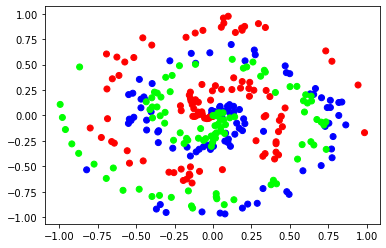

In [36]:
plt.scatter(X[:,0],X[:,1],c = y,cmap = 'brg')

In [46]:
dense1 = Dense_Layer(2,3)
activation1 = Activation_ReLU()
dense2 = Dense_Layer(3,3)
activation2 = Activation_Softmax()

In [48]:
dense1.forward_pass(X)

In [49]:
activation1.forward(dense1.output)

In [50]:
dense2.forward_pass(activation1.output)

In [51]:
activation2.forward(dense2.output)

In [54]:
print(activation2.output[:5])
print(np.sum(activation2.output,axis = 1,keepdims=True)[:5])

[[0.33333333 0.33333333 0.33333333]
 [0.3333332  0.3333331  0.3333337 ]
 [0.33333297 0.33333286 0.33333417]
 [0.33333288 0.33333261 0.33333452]
 [0.3333329  0.33333244 0.33333466]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
